### Importa librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa

### Importa datos

In [2]:
#Lee archivo de texto y poe información en una variable
f = open ('esto es una prueba.txt','r')
mensaje = f.read()

In [3]:
#Separa información y lo pone en una lista tipo str
raw_data = mensaje.split()
len(raw_data)

4096

In [4]:
#Conversión str a float
for i in range(len(raw_data)):
    raw_data[i] = float(raw_data[i])
len(raw_data)

4096

### Grafica señal original

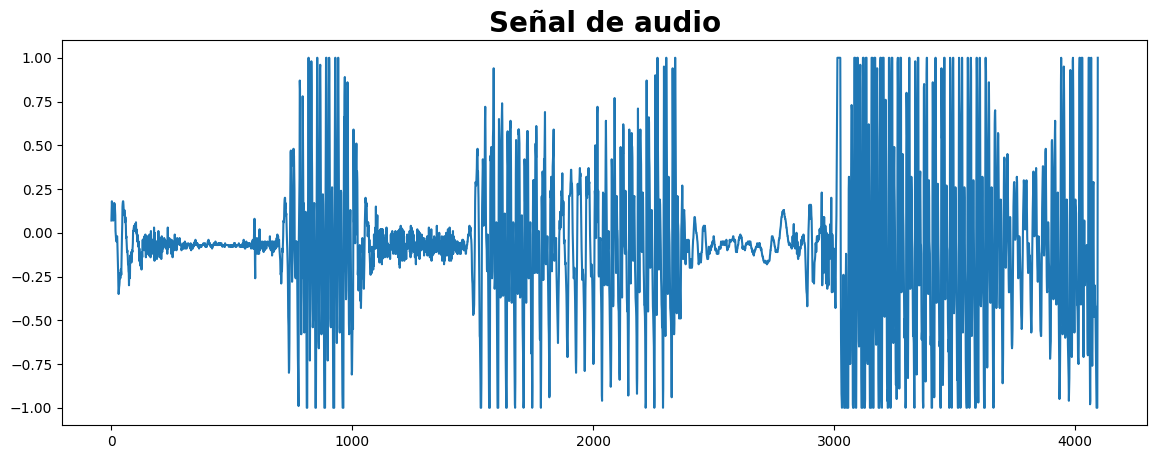

In [5]:
#Grafica la señal
plt.figure(figsize=(14, 5))
plt.plot(raw_data)
plt.title("Señal de audio", {'fontsize':20, 'fontweight':'bold'})
plt.show()

In [6]:
#Reproduce audio
ipd.Audio(raw_data, rate= 6000)

### Calcula MFCC

In [21]:
#Parámetros del espectrograma
#n_fft tamaño de la transformada de fourier
#n_fft in speech processing recommended value is 512
sampling_rate = 8192
n_fft = 128
win_length = n_fft
window ='hann'
hop_length = 64 #n_fft/4
n_mfcc = 28

In [30]:
#Calcula las primeras 28 dimensiones de loscoeficientes espectrales en las frecuencias de mel
mfcc = librosa.feature.mfcc(y=np.float32(raw_data), 
                            sr=sampling_rate, 
                            n_fft=n_fft,
                            norm = 'ortho',
                            hop_length=hop_length, 
                            n_mfcc=n_mfcc)

#convierte valores a con escala logarítmica
mfcc_db = librosa.amplitude_to_db(mfcc)

In [27]:
mfcc.shape

(28, 65)

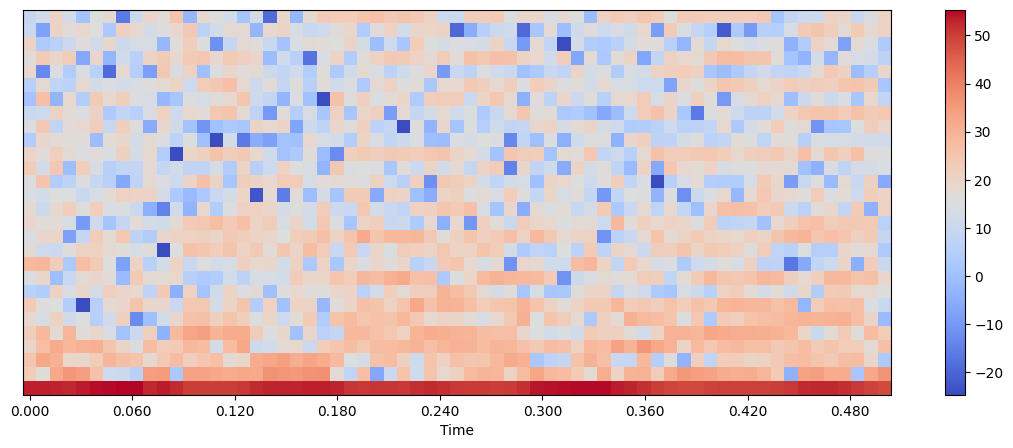

In [31]:
# Plot the figure
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfcc_db, sr=sampling_rate, hop_length=hop_length, x_axis='time')
plt.colorbar()

In [16]:
mfcc

array([[-4.71664886e+02, -4.66366821e+02, -4.44586639e+02, ...,
        -3.45877106e+02, -3.01463440e+02, -2.69672058e+02],
       [ 1.43578005e+01,  6.37753296e+00, -4.23237228e+01, ...,
         1.16368365e+00, -4.18767776e+01, -6.66149750e+01],
       [ 1.91529083e+01,  4.09360313e+01,  3.23926697e+01, ...,
        -2.31403503e+01, -8.90816975e+00,  1.42158306e+00],
       ...,
       [-1.08401289e+01, -1.44344020e+00,  2.00080824e+00, ...,
        -7.36972713e+00, -5.09294605e+00, -1.48377657e+00],
       [-3.07375002e+00,  4.04938459e-01, -1.00213299e+01, ...,
        -1.47865629e+01, -7.96174383e+00, -1.15606136e+01],
       [-2.76968193e+00, -3.95206499e+00, -1.03281364e+01, ...,
        -2.91861486e+00, -4.71738911e+00, -1.05162983e+01]], dtype=float32)